In [1]:
#1. Calculate MSE
def mean_squared_error(actual,predicted):
    if len(actual)!=len(predicted):
        raise ValueError("Lists must have same length")
    #calculate mse
    mse = sum((a-p)**2 for a,p in zip(actual,predicted))/len(actual)
    return mse
#inputs
actual_values=list(map(float,input().split()))
predicted_values=list(map(float,input().split()))
mse=mean_squared_error(actual_values,predicted_values)
print(f"Mean Squared Error : {mse}")

 3 -0.5 2 7
 2.5 0.0 2 8


Mean Squared Error : 0.375


In [6]:
#3. Apply batch normalization to a layer's activations in a neural network
import numpy as np

def batch_normalization(inputs, gamma, beta, epsilon=1e-5):
    # Step 1: Calculate the mean and variance of the batch
    batch_mean = np.mean(inputs, axis=0)
    batch_variance = np.var(inputs, axis=0)
    
    # Step 2: Normalize the inputs
    normalized_inputs = (inputs - batch_mean) / np.sqrt(batch_variance + epsilon)
    
    # Step 3: Scale and shift using gamma and beta
    normalized_outputs = gamma * normalized_inputs + beta
    
    return normalized_outputs

def get_input_data():
    n_samples=int(input())
    n_features=int(input())
    inputs=np.zeros((n_samples,n_features))
    for i in range(n_samples):
        input_values=input()
        inputs[i]=np.array(list(map(float,input_values.split())))
    return inputs

inputs=get_input_data()
gamma=np.ones((inputs.shape[1],))
beta=np.zeros((inputs.shape[1],))
outputs=batch_normalization(inputs,gamma,beta)
print(f"Batch normalized outputs:\n {outputs}")

 3
 2
 3.0 4.0
 1.0 2.0
 2.0 3.0


Batch normalized outputs:
 [[ 1.22473569  1.22473569]
 [-1.22473569 -1.22473569]
 [ 0.          0.        ]]


In [7]:
#4. Jaccard similarity

def jaccard_similarity(set1, set2):
    # Calculate the intersection and union of the sets
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    
    # Avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate Jaccard similarity
    jaccard_index = intersection / union
    return jaccard_index

# Function to take runtime input for sets
def get_input_set(set_number):
    input_values = input(f"Enter elements for Set {set_number} (separated by spaces): ")
    return set(input_values.split())

# Example usage
set_a = get_input_set(1)  # Get first set from user
set_b = get_input_set(2)  # Get second set from user

# Calculate Jaccard similarity
similarity = jaccard_similarity(set_a, set_b)
print(f"Jaccard Similarity: {similarity:.4f}")


Enter elements for Set 1 (separated by spaces):  apple banana cherry
Enter elements for Set 2 (separated by spaces):  banana cherry date


Jaccard Similarity: 0.5000


In [8]:
#5. Implementing SGD algorithm

import numpy as np

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Fit the model to the training data."""
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.weights = np.zeros(n_features)

        # Stochastic Gradient Descent
        for _ in range(self.n_iterations):
            for i in range(n_samples):
                # Compute the linear combination
                linear_output = np.dot(X[i], self.weights)
                
                # Compute predicted probability
                y_predicted = self.sigmoid(linear_output)

                # Compute the gradient
                gradient = (y_predicted - y[i]) * X[i]

                # Update weights
                self.weights -= self.learning_rate * gradient

    def predict(self, X):
        """Predict binary labels for the input data."""
        linear_output = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

# Example usage
if __name__ == "__main__":
    # Sample data: 4 samples, 2 features
    X = np.array([[1, 2],
                  [1, 3],
                  [2, 1],
                  [2, 2]])
    y = np.array([0, 0, 1, 1])  # Corresponding labels

    # Create and fit the model
    model = LogisticRegressionSGD(learning_rate=0.1, n_iterations=1000)
    model.fit(X, y)

    # Predictions
    predictions = model.predict(X)
    print("Predictions:", predictions)


Predictions: [0 0 1 1]


In [9]:
#6. perform the backpropagation step for a simple feedforward neural network with one hidden layer
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def backpropagation(X, y, weights_input_hidden, weights_hidden_output, learning_rate=0.01):
    
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

   
    error_output_layer = y - predicted_output
    d_predicted_output = error_output_layer * sigmoid_derivative(predicted_output)
    
   
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
   
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    
    return weights_input_hidden, weights_hidden_output, error_output_layer


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

np.random.seed(42)
weights_input_hidden = np.random.rand(2, 2)  
weights_hidden_output = np.random.rand(2, 1)  


new_weights_input_hidden, new_weights_hidden_output, error = backpropagation(X, y, weights_input_hidden, weights_hidden_output)

print("Updated input-hidden weights:\n", new_weights_input_hidden)
print("Updated hidden-output weights:\n", new_weights_hidden_output)
print("Error:\n", error)

Updated input-hidden weights:
 [[0.37454169 0.95071799]
 [0.73199165 0.59866696]]
Updated hidden-output weights:
 [[0.15571812]
 [0.15570242]]
Error:
 [[-0.53892274]
 [ 0.44867606]
 [ 0.4489381 ]
 [-0.56117033]]


In [10]:
#7. Implementing the decision tree algorithm

import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini_impurity(self, y):
        """Calculate the Gini impurity for a list of classes."""
        class_labels, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((counts / counts.sum()) ** 2)
        return impurity

    def split_dataset(self, X, y, feature_index, threshold):
        """Split the dataset into left and right subsets based on a feature and threshold."""
        left_indices = X[:, feature_index] < threshold
        right_indices = X[:, feature_index] >= threshold
        return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

    def best_split(self, X, y):
        """Find the best feature and threshold to split the dataset."""
        best_impurity = float("inf")
        best_feature = None
        best_threshold = None
        n_features = X.shape[1]

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                impurity = (len(y_left) / len(y) * self.gini_impurity(y_left) +
                            len(y_right) / len(y) * self.gini_impurity(y_right))
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree."""
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # Stopping conditions
        if len(unique_classes) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return unique_classes[0]  # Return the class label

        # Find the best split
        best_feature, best_threshold = self.best_split(X, y)
        if best_feature is None:
            return np.random.choice(unique_classes)  # Randomly choose class if no split found

        # Split the dataset
        X_left, y_left, X_right, y_right = self.split_dataset(X, y, best_feature, best_threshold)

        # Create subtrees
        left_subtree = self.build_tree(X_left, y_left, depth + 1)
        right_subtree = self.build_tree(X_right, y_right, depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        """Fit the decision tree model to the training data."""
        self.tree = self.build_tree(X, y)

    def predict_one(self, x):
        """Predict the class label for a single sample."""
        node = self.tree
        while isinstance(node, tuple):
            feature_index, threshold, left_subtree, right_subtree = node
            if x[feature_index] < threshold:
                node = left_subtree
            else:
                node = right_subtree
        return node

    def predict(self, X):
        """Predict class labels for the input samples."""
        return np.array([self.predict_one(x) for x in X])

# Example usage
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[2, 3],
                  [1, 1],
                  [2, 2],
                  [3, 1],
                  [3, 3]])
    y = np.array([0, 0, 0, 1, 1])  # Class labels

    # Create and fit the decision tree
    tree = DecisionTree(max_depth=3)
    tree.fit(X, y)

    # Predictions
    predictions = tree.predict(X)
    print("Predictions:", predictions)


Predictions: [0 0 0 1 1]


In [11]:
#8. computing F1 score

import numpy as np

def f1_score(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8000000000000002


In [12]:
#9. Implementing SVM 

import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [1, 0], [0, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

svm = SVM()
svm.fit(X, y)
predictions = svm.predict(X)
print("Predictions:", predictions)

Predictions: [ 1.  1.  1.  1. -1.  1.]


In [14]:
#10. Computing pearson correlation coefficient between two sets of data

import numpy as np

def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    if denominator == 0:
        return 0
    return numerator / denominator

# Example usage
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

correlation = pearson_correlation(x, y)
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -1.0


In [15]:
#11. Implementing Adagrad optimizer 

import numpy as np

class Adagrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.grad_squared = None

    def update(self, weights, gradients):
        if self.grad_squared is None:
            self.grad_squared = np.zeros_like(weights)
        self.grad_squared += gradients ** 2
        adjusted_grad = gradients / (np.sqrt(self.grad_squared) + self.epsilon)
        weights -= self.learning_rate * adjusted_grad
        return weights

class LinearRegression:
    def __init__(self, optimizer):
        self.optimizer = optimizer
        self.weights = None

    def fit(self, X, y, epochs):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(epochs):
            y_pred = np.dot(X, self.weights)
            gradients = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            self.weights = self.optimizer.update(self.weights, gradients)

    def predict(self, X):
        return np.dot(X, self.weights)

# Example usage
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([1, 2, 2, 3])

adagrad_optimizer = Adagrad(learning_rate=0.1)
model = LinearRegression(optimizer=adagrad_optimizer)
model.fit(X, y, epochs=100)

predictions = model.predict(X)
print("Predictions:", predictions)

Predictions: [1.13187709 1.75093902 2.26375418 2.88281611]


In [16]:
#12. Simulate Markov chain

import numpy as np

def simulate_markov_chain(transition_matrix, initial_state, n_steps):
    state = initial_state
    for _ in range(n_steps):
        state = np.random.choice(len(transition_matrix), p=transition_matrix[state])
    return state

# Example usage
if __name__ == "__main__":
    transition_matrix = np.array([[0.1, 0.9], [0.8, 0.2]])
    initial_state = 0
    n_steps = 10
    print("Final state:", simulate_markov_chain(transition_matrix, initial_state, n_steps))


Final state: 0


In [17]:
#13. Implementing naive bayes classifier

import numpy as np

class NaiveBayes:
    def __init__(self):
        self.mean = {}
        self.variance = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.variance[cls] = X_cls.var(axis=0)
            self.prior[cls] = len(X_cls) / len(X)

    def gaussian(self, x, mean, variance):
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                likelihood = np.prod(self.gaussian(x, self.mean[cls], self.variance[cls]))
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

# Example usage
X = np.array([[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [6.0, 9.0]])
y = np.array([0, 0, 1, 1])

model = NaiveBayes()
model.fit(X, y)
predictions = model.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 1 1]


In [19]:
#14. Compute Silhoutte score

import numpy as np
from sklearn.metrics import pairwise_distances

def silhouette_score(X, labels):
    n_samples = X.shape[0]
    distances = pairwise_distances(X)
    silhouette_scores = np.zeros(n_samples)

    for i in range(n_samples):
        same_cluster_mask = (labels == labels[i])
        other_cluster_mask = (labels != labels[i])

        a = distances[i][same_cluster_mask].mean() if np.sum(same_cluster_mask) > 1 else 0
        b = distances[i][other_cluster_mask].mean() if np.sum(other_cluster_mask) > 0 else 0

        silhouette_scores[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return silhouette_scores.mean()

# Example usage
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

labels = np.array([0, 0, 0, 1, 1, 1])  # Cluster labels for the data points

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5247605316537637


In [20]:
#15. Implementing autoencoder neural network

import numpy as np

class Autoencoder:
    def __init__(self, n_inputs, n_hidden, learning_rate=0.01, n_iters=1000):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.lr = learning_rate
        self.n_iters = n_iters

        # Initialize weights and biases
        self.W1 = np.random.randn(n_inputs, n_hidden) * 0.01  # Encoder weights
        self.b1 = np.zeros((1, n_hidden))  # Encoder bias
        self.W2 = np.random.randn(n_hidden, n_inputs) * 0.01  # Decoder weights
        self.b2 = np.zeros((1, n_inputs))  # Decoder bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X):
        for _ in range(self.n_iters):
            # Forward pass
            hidden = self.sigmoid(np.dot(X, self.W1) + self.b1)
            output = self.sigmoid(np.dot(hidden, self.W2) + self.b2)

            # Compute loss (mean squared error)
            loss = X - output

            # Backward pass (gradient descent)
            d_output = loss * self.sigmoid_derivative(output)
            d_hidden = np.dot(d_output, self.W2.T) * self.sigmoid_derivative(hidden)

            # Update weights and biases
            self.W2 += self.lr * np.dot(hidden.T, d_output)
            self.b2 += self.lr * np.sum(d_output, axis=0, keepdims=True)
            self.W1 += self.lr * np.dot(X.T, d_hidden)
            self.b1 += self.lr * np.sum(d_hidden, axis=0, keepdims=True)

    def predict(self, X):
        hidden = self.sigmoid(np.dot(X, self.W1) + self.b1)
        return self.sigmoid(np.dot(hidden, self.W2) + self.b2)

# Example usage
if __name__ == "__main__":
    # Example input data
    X = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8], [0.9, 1.0]])

    # Create and train the autoencoder
    autoencoder = Autoencoder(n_inputs=2, n_hidden=1, learning_rate=0.1, n_iters=5000)
    autoencoder.fit(X)

    # Compress and reconstruct input data
    reconstructed = autoencoder.predict(X)
    print("Reconstructed Data:", reconstructed)


Reconstructed Data: [[0.16336188 0.23649597]
 [0.25594834 0.35891314]
 [0.4851511  0.61614498]
 [0.74374057 0.83875763]
 [0.86062659 0.91969163]]


In [22]:
#16. Performing sentiment analysis

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def sentiment_analysis(text_data, labels):
    # Step 1: Bag-of-Words model (Convert text to numerical features)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text_data)  # Convert text data to a matrix of word counts

    # Step 2: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Step 3: Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Step 4: Predict on the test set
    y_pred = model.predict(X_test)

    # Step 5: Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Predictions:", predictions)

    return model, vectorizer

# Example usage
if __name__ == "__main__":
    # Example dataset (text samples and corresponding sentiment labels)
    text_data = [
        "I love this movie, it's fantastic!",
        "This film was terrible and boring.",
        "I enjoyed watching this, great experience!",
        "The plot was dull, not worth my time.",
        "Amazing acting, thoroughly enjoyed it.",
        "I didn't like this movie, it was awful."
    ]
    labels = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

    # Perform sentiment analysis
    sentiment_analysis(text_data, labels)


Accuracy: 50.00%
Predictions: [0 0 1 1]


In [23]:
#17. Implementing MCC

import numpy as np

def mcc(y_true, y_pred):
    # Calculate TP, TN, FP, FN
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # MCC formula
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Avoid division by zero
    return numerator / denominator if denominator != 0 else 0

# Example usage
if __name__ == "__main__":
    # Example ground truth and predictions
    y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
    y_pred = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

    # Calculate MCC
    mcc_value = mcc(y_true, y_pred)
    print(f"MCC: {mcc_value:.4f}")


MCC: 0.6000


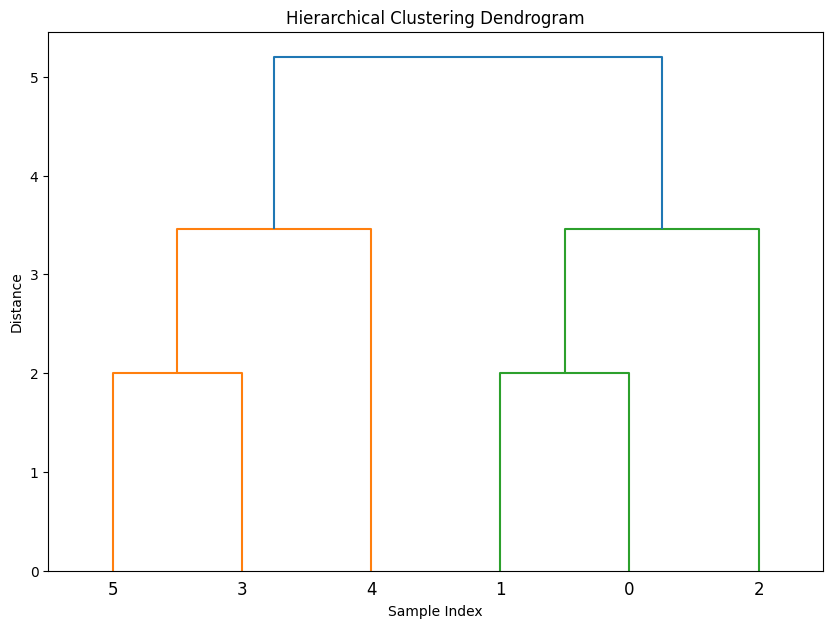

In [24]:
#18. perform the hierarchical clustering algorithm on a dataset, and return a dendrogram representing the clusters

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical_clustering(data):
    linked = linkage(data, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


data = np.array([[1, 2], [1, 4], [1, 0],
                 [4, 2], [4, 4], [4, 0]])

hierarchical_clustering(data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Epoch: 0, Discriminator Loss: 0.7048627138137817, Generator Loss: [array(0.6132261, dtype=float32), array(0.6132261, dtype=float32), array(0.6328125, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

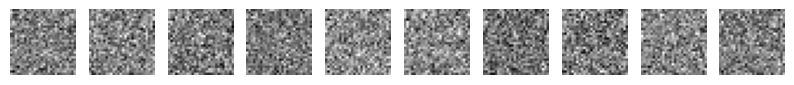

In [27]:
#19. Implement a function to generate synthetic images using GAN

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])
    return model

def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_gan(epochs, batch_size, latent_dim):
    # Load and preprocess the MNIST dataset
    (X_train, _), (_, _) = keras.datasets.mnist.load_data()
    X_train = X_train.astype(np.float32) / 255.0

    generator = build_generator(latent_dim)
    discriminator = build_discriminator()

    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

def generate_images(generator, num_images, latent_dim):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    return generated_images

latent_dim = 100
train_gan(epochs=100, batch_size=64, latent_dim=latent_dim)


generator = build_generator(latent_dim)
generated_images = generate_images(generator, num_images=10, latent_dim=latent_dim)


plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()